## [웹크롤링 _ 나무위키 사이트 분석 및 시각화]
### <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

[웹크롤링 라이브러리 사용하기]
- 파이썬에서는 BeautifulSoup와 requests 라는 라이브러리로 웹 크롤러를 만들 수 있음
- requests는 특정 url로부터 html 문서를 가져오는 작업을 수행
- 나무위키와 같은 페이지는 html 문서가 javascript로 동적 로딩되는 경우가 있음
- requests 대신 셀레니움(selenium) 라이브러리를 이용해 크롬 브라우저로 동적 웹크롤링 수행
- selenium은 웹 브라우저를 자동으로 구동해주는 라이브러리
- selenium을 사용하기 위해 크롬 드라이버를 이용해 크롬 브라우저 자동으로 구동 => 크롬드라이버 필요

### [BeautifulSoup와 selenium을 이용한 웹 크롤링]
- anaconda prompt 혹은 terminal 에서 아래와 같은 패키지들을 설치
- pip install selenium
- pip install beautifulsoup4

### [크롬 브라우저 업데이트 및 크롬 드라이버 설치]
- 크롬 브라우저 설정해서 최신 버전으로 업데이트
- 크롬 드라이버 사이트에서 브라우저 버전에 맞는 드라이버 다운로드
    - https://chromedriver.chromium.org/downloads
- chromedriver.exe 파일을 노트북 파일 경로에 이동 



In [1]:
!pip install selenium

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### BeautifulSoup의 select() VS find_all()
- html 의 특정 요소 선택
- select, select_one 의 경우 css 선택자를 이용하는 것처럼 사용 가능
- select의 경우 후손이나 자손 요소를 css처럼 선택 가능
- 예) soup.select("dl>dt>a")
- find_all, find의 경우 하나의 태그(name="table")나 하나의 클래스(class="tables")를 선택
- find 의 경우 후손이나 자손 요소를 직접 선택할 수 없어 한 번 더 변수에 담든지 루프 문을 이용해야 함
- 예) find_all(class = "ah_roll"), find(name="table")

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re #정규식 표현을 위한 모듈 

In [4]:
#윈도우용 크롬 웹드라이버 실행 경로 (windows)지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path = excutable_path)



#사이트의 html 구조에 기반하여 크롤링을 수행
source_url = "https://namu.wiki/RecentChanges" #크롤링할 사이트 주소를 정의
driver.get(source_url) #크롬 드라이버를 통해 url의 html 문서 가져옴


#영진씨방법
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
element = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME, "app")))

# #명진씨방법
# import time
# time.sleep(10)


req = driver.page_source #전체페이지 
print(req)

<html><head><link href="/skins/senkawa/6.4cd8c9c215a8ec226109.css" rel="stylesheet"><link href="/skins/senkawa/3.6578e2190d7f10b0f082.css" rel="stylesheet"><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link rel="stylesheet" type="text/css" href="/skins/senkawa/10.a1e48eb86746983c527d.css"><script charset="utf-8" src="/skins/senkawa/10.a1e48eb86746983c527d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" rel="canonical" href="https://namu.wiki/RecentChanges"><link data-n-head="1" rel="search" type="application/opensearchdescription+xml" title="나무위키" href="/opensearch.xml"><

In [5]:
soup = BeautifulSoup(req, "html.parser") #BeautifulSoup 의 soup로 가공 
soup

<html><head><link href="/skins/senkawa/6.4cd8c9c215a8ec226109.css" rel="stylesheet"/><link href="/skins/senkawa/3.6578e2190d7f10b0f082.css" rel="stylesheet"/><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link href="/skins/senkawa/10.a1e48eb86746983c527d.css" rel="stylesheet" type="text/css"/><script charset="utf-8" src="/skins/senkawa/10.a1e48eb86746983c527d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" href="https://namu.wiki/RecentChanges" rel="canonical"/><link data-n-head="1" href="/opensearch.xml" rel="search" title="나무위키" type="application/opensearchdescription+xm

In [6]:
contents_table = soup.find(name="table") #find 함수를 이용해 태그명이 table인 것을 찾기
table_body = contents_table.find(name= "tbody") #table 안 tbody 태그인 것 찾기
table_rows = table_body.find_all(name="tr") #table tbody 안 tr태그인 것 찾기 => [ ]의 요소로 담김 
#table_body
table_rows[0]


<tr class="" data-v-17dde2e0=""><td data-v-17dde2e0=""><a data-v-17dde2e0="" href="/w/%EC%82%AC%ED%9A%8C%ED%95%99">사회학</a> <a data-v-17dde2e0="" href="/history/%EC%82%AC%ED%9A%8C%ED%95%99">[역사]</a> <a data-v-17dde2e0="" href="/diff/%EC%82%AC%ED%9A%8C%ED%95%99?rev=432&amp;oldrev=431">[비교]</a> <a data-v-17dde2e0="" href="/discuss/%EC%82%AC%ED%9A%8C%ED%95%99">[토론]</a> <span data-v-17dde2e0="">(<span class="KqOjPCWR" data-v-17dde2e0="" data-v-6cbb5b59="">+4</span>)</span></td> <td data-v-17dde2e0=""><div class="v-popover" data-v-17dde2e0="" data-v-1de7cf8c=""><div aria-describedby="popover_c28n58w88y" class="trigger" style="display: inline-block;"><a class="zypMHhwu" data-v-1de7cf8c="">JHP3232</a> </div> </div> <!-- --></td> <td data-v-17dde2e0=""><time data-v-17dde2e0="" datetime="2022-01-25T02:59:06.000Z">2022-01-25 11:59:06</time></td></tr>

In [7]:
len(table_rows)

107

### [페이지 링크주소 리스트 가져오기]

In [8]:
#특성 속성 값을 추출
page_url_base = "https://namu.wiki" #베이스 url 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트  

for i in range(0, len(table_rows)): #table_rows의 길이만큼 반복
    first_td = table_rows[i].find_all('td')[0] #td가 3개 있는데 0번째에 원하는 href 가 있음 
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        #page_url = page_url_base + td_url[0].get('href') #나무위키주소+get() 태그가 가지고 있는 속성 추출 
        page_url = page_url_base + td_url[0].attrs["href"] #attrs[]는 딕셔너리 형태로 속성명과 속성값을 불러옴 
        if "png" not in page_url:
            page_urls.append(page_url)
          
        
page_urls = list(set(page_urls)) #중복 url 제거
for page in page_urls[:3]:
    print(page)

https://namu.wiki/w/%EC%9D%B8%ED%94%BC%EB%8B%88%ED%8A%B8(%EC%95%84%EC%9D%B4%EB%8F%8C)/%EC%97%AD%EC%82%AC
https://namu.wiki/w/1%EB%B0%95%202%EC%9D%BC/2010%EB%85%84/%EA%B2%BD%EB%B6%81%20%EC%95%88%EB%8F%99
https://namu.wiki/w/%EC%A0%84%EC%9F%81%EA%B8%B0%EB%85%90%EA%B4%80


### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [9]:
page_urls

['https://namu.wiki/w/%EC%9D%B8%ED%94%BC%EB%8B%88%ED%8A%B8(%EC%95%84%EC%9D%B4%EB%8F%8C)/%EC%97%AD%EC%82%AC',
 'https://namu.wiki/w/1%EB%B0%95%202%EC%9D%BC/2010%EB%85%84/%EA%B2%BD%EB%B6%81%20%EC%95%88%EB%8F%99',
 'https://namu.wiki/w/%EC%A0%84%EC%9F%81%EA%B8%B0%EB%85%90%EA%B4%80',
 'https://namu.wiki/w/%ED%95%9C%EB%AF%B8%20%EB%AF%B8%EC%82%AC%EC%9D%BC%20%EC%82%AC%EA%B1%B0%EB%A6%AC%20%EC%A7%80%EC%B9%A8',
 'https://namu.wiki/w/%EA%B0%9C%20%EB%8C%80%EC%9E%A5',
 'https://namu.wiki/w/%EB%B2%A0%EC%96%B4%20%EB%84%88%ED%81%B4%20%EC%8B%9C%EB%A6%AC%EC%A6%88/%EC%A0%81%20%EC%BA%90%EB%A6%AD%ED%84%B0',
 'https://namu.wiki/w/%EB%B6%84%EB%A5%98:%EB%A0%88%EB%B8%8C%20-%20%EA%BF%88%EA%BE%B8%EB%8A%94%20%EC%86%8C%EB%85%80',
 'https://namu.wiki/w/%EC%9D%B4%EC%9E%AC%EB%AA%85/%EB%B3%84%EB%AA%85',
 'https://namu.wiki/w/%EC%BD%94%EB%AF%B8%EB%94%94%EB%B9%85%EB%A6%AC%EA%B7%B8/%EC%9C%A0%ED%96%89%EC%96%B4%20%EC%9D%BC%EB%9E%8C',
 'https://namu.wiki/w/%EC%9C%A0%EC%9A%B0%ED%82%A4%20%EB%84%A4%EC%9D%B4',
 'https://namu.wi

### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [10]:
# 윈도우용 크롬 웹드라이버 실행경로(windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path = excutable_path)
#크롬 드라이버를 통해 page_urls[0]번째 사이트의 html 문서 가져옴 
driver.get(page_urls[0]) #page_urls[0]번쨰의 정보를 가져옴
req=driver.page_source #페이지 소스를 req에 저장 
soup = BeautifulSoup(req,'html.parser') #html.parser로 파싱
contents_table=soup.find(name="article") #article 태그 하나만 불러오기 

#타이틀 추출
title = contents_table.find_all('h1')[0]

#카테고리 추출
category = contents_table.find_all('ul')[0]
#contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"}) # div 태그 중 class 속성값이 wiki-paragraph
#div 태그 중 클래스이름이 wiki-paragraph인 요소 모두 추출
content_paragraphs = contents_table.select("div.wiki-paragraph") 


#내용으로 추출한 리스트를 하나의 문자열로 전처리
content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성 
for paragraphs in content_paragraphs: # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    content_corpus_list.append(paragraphs.text) #가져온 결과 태그 중 텍스트만 추출하여 content_corpus_list에 추가
content_corpus=" ".join(content_corpus_list) # "텍스트".join(리스트명)=> 리스트의 요소를 "텍스트"로 구분하여 하나의 문자열로 만듦

print(title.text) #제목출력 
print("\n")
print(category.text) #카테고리 출력
print("\n")
print(content_corpus) #내용출력

#크롤링에 사용한 브라우저를 종료합니다
driver.close()
    

인피니트(아이돌)/역사 


인피니트(아이돌)


   상위 문서: 인피니트(아이돌) 김성규장동우남우현이성열엘이성종 [ 전 멤버 ]호야 [ 유닛 ] [ 리얼리티 ]인피니트! 당신은 나의 오빠인피니트의 깨알Player인피니트 서열왕디스 이즈 인피니트쇼타임 인피니트 [ 관련 문서 ]음반콘서트활동인스피릿역사V LIVE자체 콘텐츠GROW: 인피니트의 리얼 청춘 라이프   인피니트! 당신은 나의 오빠 인피니트의 깨알Player 인피니트 서열왕 디스 이즈 인피니트 쇼타임 인피니트 음반 콘서트 활동 인스피릿 역사 V LIVE 자체 콘텐츠 GROW: 인피니트의 리얼 청춘 라이프 1. 개요2. 20102.1. 인피니트! 당신은 나의 오빠2.2. 미니 1집 "First Invasion"2.3. 디지털 싱글 "She's Back"3. 20113.1. 미니 2집 "Evolution"3.2. 1st 싱글 "INSPIRIT"3.3. 디지털 싱글 "Can U Smile"3.4. 인피니트의 깨알Player3.5. 정규 1집 "Over the Top"3.6. 정규 1집 스페셜 리패키지 "Paradise"3.7. 디지털 싱글 "하얀 고백"3.8. 2011년 에피소드4. 20124.1. 미니3집 "INFINITIZE"4.2. 인피니트 서열왕4.3. 이후 활동5. 20135.1. 미니 4집 "New Challenge"5.2. 2013년 각종 활동5.3. 2nd 싱글 "Destiny"5.4. 월드투어 "One Great Step"5.5. 2013년 에피소드6. 20146.1. COLOR OF INFINITE6.2. 디스 이즈 인피니트6.3. 인스트루멘탈 버전 앨범 "The Origin"6.4. 정규 2집 "Season 2"6.5. 정규 2집 리패키지 "BE BACK"6.6. 이후 활동7. 20157.1. 라이브 앨범 "One Great Step Returns Live"7.2. 미니 5집 "Reality"7.3. 월드투어 "INFINITE EFFECT"7.4. 쇼타임 인피니트8. 20168.1. 디

### [각 링크 페이지 크롤링하여 제목, 카테고리, 내용 출력]

In [11]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

#for page_url in page_urls:
for i in range(10):
    # 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
    excutable_path = "chromedriver.exe"
    driver = webdriver.Chrome(executable_path=excutable_path)
    # 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
    #driver.get(page_url)  # page_urls[i],  page_url의 정보를 가져옴
    driver.get(page_urls[i])  # page_urls[i],  page_url의 정보를 가져옴
    req = driver.page_source # 페이지 소스를 req에 저장
    soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
    contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

    ### 타이틀 추출
    title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1
    if title is not None: #타이틀에 아무내용도 없으면 
        row_title = title.text.replace("\n", " ") #빈 칸으로 교체 
    else:
        row_title = ""
        
    ### 카테고리 추출
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0: # article ul 로 검색한 결과 여러 ul 결과가 나올 경우
        category = contents_table.find_all("ul")[0] # 제일 첫번째 article ul 을 category로 설정
    else:
        category = None
        
    if category is not None: #카테고리가 비어 있으면
        row_category = category.text.replace("\n", " ") #빈 칸으로 교체
    else:
        row_category = ""

    ### 내용 추출
    #contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
    #div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
    content_paragraphs = contents_table.select("div.wiki-paragraph")  
    #  내용으로 추출한 리스트를 하나의 문자열로 전처리
    content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
    
    # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    # 모든 정보를 하나의 데이터 프레임에 저장하기 위해서 시리즈 생성
    # 각 페이지의 정보를 추출하여 제목, 카테고리, 내용 순으로 행을 생성
    row = [row_title, row_category, "".join(content_corpus_list)]
    # 시리즈로 만듦
    series = pd.Series(row, index=df.columns)
    # 데이터 프레임에 시리즈를 추가, 한 페이지 당 하나의 행 추가
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [12]:
df

,title,category,content_text
0,인피니트(아이돌)/역사,인피니트(아이돌),상위 문서: 인피니트(아이돌)김성규장동우남우현이성열엘이성종 [ 전 멤버 ]호야...
1,1박 2일/2010년/경북 안동,1박 2일/에피소드,상위 문서: 1박 2일/2010년1. 개요2. 방송 내용2.1. 1부2.2. ...
2,전쟁기념관,대한민국 국방부전쟁·군사 박물관서울특별시의 박물관용산구사립박물관대한민국의 안보관광용산기지,대한민국의국립박물관 대한민국의국립박물관 [ 펼치기 · 접기 ] ...
3,한미 미사일 사거리 지침,대한민국 국군미군한미관계2021년 폐지,로그인 후 편집 가능한 문서입니다. 한미관계 관련 문서 [ 펼치기 · 접기 ...
4,개 대장,이누야샤/등장인물반요 야샤히메/등장인물,등장인물 목록 [ 펼치기 · 접기 ]이누야샤카고메미로쿠산고싯포키라라셋쇼마루링쟈켄...
5,베어 너클 시리즈/적 캐릭터,베어 너클 시리즈베어 너클 시리즈/등장인물,상위 문서: 베어 너클 시리즈1. 개요2. 말단(잡몹)2.1. 일반잡몹2.1....
6,분류:레브 - 꿈꾸는 소녀,한국 게임카카오게임롤플레잉 게임2014년 모바일 게임서비스 종료 게임/2017년,
7,이재명/별명,정치인 별명이재명,로그인 후 편집 가능한 문서입니다. 상위 문서: 이재명이 문서는이 문단은 ...
8,코미디빅리그/유행어 일람,코미디빅리그,상위 문서: 코미디빅리그역대 시즌 일람2011 가을2012 겨울시즌32012-...
9,유우키 네이,유우키 네이,은(는) 여기로 연결됩니다. 다른 뜻에 대한 내용은 아래 문서를 참고하십시오....


# [명사만을 추출하여 워드 클라우드 그리기]

## [코엔엘파이(konlpy)를 이용한 형태소 분석]

- 품사란 단어를 기능, 형태, 의미에 따라 나눈 갈래
- 우리나라의 학교 문법에서는 명사, 대명사, 수사, 조사, 동사, 형용사, 관형사, 부사, 감탄사의 아홉 가지로 분류

### [형태소 분석과 품사 태깅]

- 형태소: 더 이상 분리를 할 수 없는 의미를 갖는 최소 단어를 의미
- 형태소 분석: 형태소를 비롯하여, 어근, 접두사/접미사, 품사 등 다양한 언어적 속성의 구조를 파악하는 것
- 품사 태깅: 형태소와 품사를 매칭시키는 것 

### [빈도 분석: 문장 형태소 분석 - Konlpy]

- Konlpy: 파이썬 한국어 형태소 분석 라이브러리

#  <Step2. 키워드 추출> 

### [텍스트 데이터 전처리] 정규식을 사용하여 한글과 띄어쓰기만 가져오기
#### 파이썬 정규표현식(re) 사용법 -05. 주석, 치환, 분리

- 정규표현식: 컴파일 => re.compile, 컴파일을 미리 해 두고 이를 저장
- 정규표현식: 치환 => re.sub(pattern, repl, string, flags)


In [13]:
# 한글 코드 범위
# ㄱ ~ ㅎ : 0x3131 ~ 0x314e
# ㅏ~ ㅣ : 0x314f ~ 0x3163
# 가~ 핳: 0xac00 ~ 0xd7a3
# [^ㄱ- l가~ 힣+ ] 한글과 띄어쓰기의 정규식 패턴

#사용자 정의 함수 선언
def text_cleaning(text):
    #한글과 띄어쓰기를 제외한 모든 글자 패턴을 지정하여 hangul로 정의
    hangul = re.compile('[^ㄱ-ㅣ가-힣]+') # ^ 있으면 한글만 나옴 . ^ 없으면 한글을 지움 
    result=hangul.sub(' ', text) #한글과 띄어쓰기를 제외한 모든 글자 패턴을 ''빈 문자로 치환
    return result
    

In [14]:
df['title'][0]

'인피니트(아이돌)/역사 '

In [15]:
df['content_text'][0]

' \xa0 상위 문서: 인피니트(아이돌)김성규장동우남우현이성열엘이성종 [ 전 멤버 ]호야 [ 유닛 ] [ 리얼리티 ]인피니트! 당신은 나의 오빠인피니트의 깨알Player인피니트 서열왕디스 이즈 인피니트쇼타임 인피니트 [ 관련 문서 ]음반콘서트활동인스피릿역사V LIVE자체 콘텐츠GROW: 인피니트의 리얼 청춘 라이프인피니트! 당신은 나의 오빠인피니트의 깨알Player인피니트 서열왕디스 이즈 인피니트쇼타임 인피니트음반콘서트활동인스피릿역사V LIVE자체 콘텐츠GROW: 인피니트의 리얼 청춘 라이프1. 개요2. 20102.1. 인피니트! 당신은 나의 오빠2.2. 미니 1집 "First Invasion"2.3. 디지털 싱글 "She\'s Back"3. 20113.1. 미니 2집 "Evolution"3.2. 1st 싱글 "INSPIRIT"3.3. 디지털 싱글 "Can U Smile"3.4. 인피니트의 깨알Player3.5. 정규 1집 "Over the Top"3.6. 정규 1집 스페셜 리패키지 "Paradise"3.7. 디지털 싱글 "하얀 고백"3.8. 2011년 에피소드4. 20124.1. 미니3집 "INFINITIZE"4.2. 인피니트 서열왕4.3. 이후 활동5. 20135.1. 미니 4집 "New Challenge"5.2. 2013년 각종 활동5.3. 2nd 싱글 "Destiny"5.4. 월드투어 "One Great Step"5.5. 2013년 에피소드6. 20146.1. COLOR OF INFINITE6.2. 디스 이즈 인피니트6.3. 인스트루멘탈 버전 앨범 "The Origin"6.4. 정규 2집 "Season 2"6.5. 정규 2집 리패키지 "BE BACK"6.6. 이후 활동7. 20157.1. 라이브 앨범 "One Great Step Returns Live"7.2. 미니 5집 "Reality"7.3. 월드투어 "INFINITE EFFECT"7.4. 쇼타임 인피니트8. 20168.1. 디지털 싱글 "그 해 여름 (두 번째 이야기)8.2. 미니 6집 "INFI

In [16]:
print(text_cleaning(df['title'][0]))

인피니트 아이돌 역사 


In [17]:
print(text_cleaning(df['content_text'][0]))

 상위 문서 인피니트 아이돌 김성규장동우남우현이성열엘이성종 전 멤버 호야 유닛 리얼리티 인피니트 당신은 나의 오빠인피니트의 깨알 인피니트 서열왕디스 이즈 인피니트쇼타임 인피니트 관련 문서 음반콘서트활동인스피릿역사 자체 콘텐츠 인피니트의 리얼 청춘 라이프인피니트 당신은 나의 오빠인피니트의 깨알 인피니트 서열왕디스 이즈 인피니트쇼타임 인피니트음반콘서트활동인스피릿역사 자체 콘텐츠 인피니트의 리얼 청춘 라이프 개요 인피니트 당신은 나의 오빠 미니 집 디지털 싱글 미니 집 싱글 디지털 싱글 인피니트의 깨알 정규 집 정규 집 스페셜 리패키지 디지털 싱글 하얀 고백 년 에피소드 미니 집 인피니트 서열왕 이후 활동 미니 집 년 각종 활동 싱글 월드투어 년 에피소드 디스 이즈 인피니트 인스트루멘탈 버전 앨범 정규 집 정규 집 리패키지 이후 활동 라이브 앨범 미니 집 월드투어 쇼타임 인피니트 디지털 싱글 그 해 여름 두 번째 이야기 미니 집 라이브 패키지 팬미팅 무한대집회 멤버 호야 탈퇴와 인조로의 재편 팬미팅 정규 집 이후 활동 팬미팅 년 디지털 싱글 년 년인피니트의 활동 역사에 관해 다루는 문서입니다 년 월 일부터 월 일까지 엠넷에서 방영한 코믹 리얼 다큐멘터리 인피니트 당신은 나의 오빠 로 처음 이름을 알렸다 총 화이고 인간극장을 패러디한 화면 구성 자막의 끊임없는 개드립등이 인상적이었다 망원동에 있는 숙소와 데뷔 전 인피니트의 안쓰럽고 불쌍하다 못해 집 사주고 싶은 실태를 그대로 보여준다 마지막 회에서는 인피니트 멤버들 다 울고 말았다 달을 같이 생활을 해왔고 그동안 정이 많이 들었기 때문이다 년 월까지 유일한 단독 리얼리티 프로그램으로 팬들의 끊임없는 복습 대상이 되었다 현재 팬들이 늦덕들에게 좀 나중에 보라고 추천해주는 만큼 지금에 비해 흑역사가 많이 담겨있다 형 커요 당시 여동생으로 출연했던 유지애는 처음에는 연기자로 갈려고 연기과에 진학하였다가 당신은 나의 오빠 촬영을 한것이었다 여담으로 스토리가 대본이었지 인피니트와 유지애의 관계는 대본이 아니었다 어쨌든 그 촬

In [18]:
# 각 피처마다 데이터 전처리를 적용
df['title'] = df['title'].apply(lambda x: text_cleaning(x)) 
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,인피니트 아이돌 역사,인피니트 아이돌,상위 문서 인피니트 아이돌 김성규장동우남우현이성열엘이성종 전 멤버 호야 유닛 리얼...
1,박 일 년 경북 안동,박 일 에피소드,상위 문서 박 일 년 개요 방송 내용 부 부 끝날 때까지는 끝난 게 아니다 기상 ...
2,전쟁기념관,대한민국 국방부전쟁 군사 박물관서울특별시의 박물관용산구사립박물관대한민국의 안보관광용산기지,대한민국의국립박물관 대한민국의국립박물관 펼치기 접기 국가정보원 안보전시관 국가보훈...
3,한미 미사일 사거리 지침,대한민국 국군미군한미관계 년 폐지,로그인 후 편집 가능한 문서입니다 한미관계 관련 문서 펼치기 접기 역사제너럴 셔먼...
4,개 대장,이누야샤 등장인물반요 야샤히메 등장인물,등장인물 목록 펼치기 접기 이누야샤카고메미로쿠산고싯포키라라셋쇼마루링쟈켄코하쿠키쿄우...


### [말뭉치 만들기]

In [19]:
# 각 피처마다 말뭉치를 생성
df['title'].tolist() #데이터프레임 타이틀 시리즈를 리스트로 만들기 


['인피니트 아이돌 역사 ',
 ' 박 일 년 경북 안동 ',
 '전쟁기념관 ',
 '한미 미사일 사거리 지침 ',
 '개 대장 ',
 '베어 너클 시리즈 적 캐릭터 ',
 '분류 레브 꿈꾸는 소녀 ',
 '이재명 별명 ',
 '코미디빅리그 유행어 일람 ',
 '유우키 네이 ']

In [20]:
#각 피처마다 말뭉치(문자열)를 생성 
#문자열로 변환 "".join()
"".join(df['title'].tolist())

title_corpus = "".join(df['title'].tolist()) #데이터프레임 title 시리즈를 -> 리스트로 변환 -> 문자열로 변환
category_corpus= "".join(df['category'].tolist())
content_corpus= "".join(df['content_text'].tolist())

print(title_corpus)

인피니트 아이돌 역사  박 일 년 경북 안동 전쟁기념관 한미 미사일 사거리 지침 개 대장 베어 너클 시리즈 적 캐릭터 분류 레브 꿈꾸는 소녀 이재명 별명 코미디빅리그 유행어 일람 유우키 네이 


In [21]:
!pip install konlpy

In [22]:
import konlpy #konlpy : 한글 형태소 분석하는 라이브러리

In [23]:
!pip install pytagcloud pygame simplejson

In [24]:
import pytagcloud 

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [25]:
#konlpy의 형태소 분석기로 명사 단위의 키워드를 추출

from konlpy.tag import Okt
from collections import Counter 

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus) # nouns() 함수를 이용하여 content_corpus 문장 중 명사만을 추출
count = Counter(nouns) #각 명사의 빈도수 계산 

In [26]:
count #딕셔너리 형태 {키: 값, 키:값,...}

Counter({'상위': 10,
         '문서': 549,
         '인피니트': 183,
         '아이돌': 21,
         '김성규': 11,
         '장동우': 7,
         '남우현': 10,
         '이성열': 3,
         '이성종': 3,
         '전': 106,
         '멤버': 88,
         '호야': 23,
         '유닛': 15,
         '리얼리티': 6,
         '당신': 11,
         '나': 58,
         '오빠': 7,
         '깨알': 5,
         '서열': 5,
         '디스': 5,
         '이즈': 3,
         '쇼타임': 7,
         '관련': 73,
         '음반': 13,
         '콘서트': 71,
         '활동': 64,
         '인스피릿': 10,
         '역사': 474,
         '자체': 32,
         '콘텐츠': 2,
         '리얼': 13,
         '청춘': 4,
         '라이프': 40,
         '개요': 9,
         '미니': 19,
         '집': 69,
         '디지털': 20,
         '싱글': 35,
         '정규': 33,
         '스페셜': 5,
         '리': 58,
         '패키지': 22,
         '고백': 3,
         '년': 259,
         '에피소드': 17,
         '이후': 165,
         '각종': 16,
         '월드': 25,
         '투어': 26,
         '인스': 1,
         '트루': 2,
         '멘탈': 4,
        

### [키워드 가다듬기]

In [27]:
# 한글자 키워드를 제거 후 내림차순 정렬
# x 는 키, count[x] 값으로 키의 값이 2 이상일 경우만 remove_char_counter 에 저장 
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1}) #글자길이가 2개이상인 것들만 담기
print(remove_char_counter)

Counter({'문서': 549, '이전': 507, '문단': 495, '역사': 474, '유우': 461, '이온': 359, '때문': 284, '공격': 262, '셋쇼마루': 247, '대장': 209, '플레이어': 202, '이누야샤': 192, '인피니트': 183, '자신': 178, '이후': 165, '이름': 159, '등장': 154, '보스': 148, '경우': 148, '세계': 146, '이재명': 142, '박물관': 134, '정도': 133, '캐릭터': 132, '부분': 128, '미사일': 125, '사실': 121, '사람': 121, '요괴': 120, '모습': 119, '합의': 118, '한국': 117, '이의': 114, '토론': 114, '다른': 110, '사항': 107, '공개': 102, '위해': 100, '마루': 99, '패턴': 96, '내용': 94, '생각': 94, '대한': 94, '아버지': 94, '앨범': 93, '기억': 91, '철쇄': 89, '멤버': 88, '대해': 87, '사거리': 86, '너클': 86, '스테이지': 86, '이자': 85, '사용': 85, '개발': 80, '또한': 79, '일본': 79, '원래': 78, '시간': 77, '관련': 73, '당시': 73, '상태': 72, '통해': 72, '콘서트': 71, '국립': 71, '나이': 71, '시작': 70, '사이': 70, '진짜': 70, '관계': 69, '미국': 69, '네로': 69, '언급': 68, '점프': 68, '하나': 67, '본인': 67, '설정': 67, '문제': 66, '루루': 65, '활동': 64, '처음': 64, '가장': 64, '발매': 63, '별명': 63, '이야기': 62, '전시': 62, '버전': 60, '다시': 59, '시점': 58, '아들': 58, '공식': 57, '게임': 57, '영혼': 57, '어머니'

### [불용어 제거]
- 실질적인 의미가 없는 키워드 처리,
- 관사나 접속사 등 실질적인 의미가 없으면서 동시에 의미적인 독립을 할 수 없는 품사 제거 
- 한국어 약식 불용어 사전 예시 파일 -출처 (https://www.ranks.nl/stopwords/korean)
- 인터넷 검색 시 검색 용어로 사용하지 않는 단어, 관사, 전치사, 조사, 접속사 등은 검색 색인 단어로 의미가 없는 단어
- 그러나, 각 검색 엔진마다 그 내용은 다를 수 있음

In [28]:
korean_stopwords_path = "korean_stopwords.txt" #불용어 사전 텍스트파일 경로

with open(korean_stopwords_path, encoding = 'utf8') as f: #불용어 텍스트 파일을 열어 f로 치환
    stopwords = f.readlines() # 파일로부터 불용어를 한줄씩 읽음 
stopwords = [x.strip() for x in stopwords] #리스트 생성. strip()  함수는 공백,줄바꿈,tab 등을 모두 제거 
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [29]:
#나무위키 페이지에 적용이 필요한 불용어 추가
namu_wiki_stopwords =['상위','문서','내용','누설','아래','해당','설명','표기','추가','모든',
                      '사용','매우','가장','줄거리','요소','상황', '편집', '틀', '경우', '때문', '모습', '정도', 
                      '이후', '사실', '생각', '인물', '이름','년월']

#기존의 불용어 텍스트 파일에 위의 namu_wiki_stopwords 리스트의 글자들을 추가 
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword) 

#키워드 데이터에서 불용어를 제거
remove_char_counter = Counter({x:remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1}) #글자길이가 2개이상인 것들만 담기

print(remove_char_counter)

Counter({'문서': 549, '이전': 507, '문단': 495, '역사': 474, '유우': 461, '이온': 359, '때문': 284, '공격': 262, '셋쇼마루': 247, '대장': 209, '플레이어': 202, '이누야샤': 192, '인피니트': 183, '자신': 178, '이후': 165, '이름': 159, '등장': 154, '보스': 148, '경우': 148, '세계': 146, '이재명': 142, '박물관': 134, '정도': 133, '캐릭터': 132, '부분': 128, '미사일': 125, '사실': 121, '사람': 121, '요괴': 120, '모습': 119, '합의': 118, '한국': 117, '이의': 114, '토론': 114, '다른': 110, '사항': 107, '공개': 102, '위해': 100, '마루': 99, '패턴': 96, '내용': 94, '생각': 94, '대한': 94, '아버지': 94, '앨범': 93, '기억': 91, '철쇄': 89, '멤버': 88, '대해': 87, '사거리': 86, '너클': 86, '스테이지': 86, '이자': 85, '사용': 85, '개발': 80, '또한': 79, '일본': 79, '원래': 78, '시간': 77, '관련': 73, '당시': 73, '상태': 72, '통해': 72, '콘서트': 71, '국립': 71, '나이': 71, '시작': 70, '사이': 70, '진짜': 70, '관계': 69, '미국': 69, '네로': 69, '언급': 68, '점프': 68, '하나': 67, '본인': 67, '설정': 67, '문제': 66, '루루': 65, '활동': 64, '처음': 64, '가장': 64, '발매': 63, '별명': 63, '이야기': 62, '전시': 62, '버전': 60, '다시': 59, '시점': 58, '아들': 58, '공식': 57, '게임': 57, '영혼': 57, '어머니'

# <Step3 . 시각화: 워드 클라우드 시각화하기>

## [pytagcloud 사용하기]

1.  아래 코드 실행을 위해 anaconda prompt 혹은 terminal 에서 아래와 같은 패키지들을 설치 
pip install pytagcloud pygame simplejson

2. 한글 폰트(예: NanumBarunGothic.ttf) 파일지정
Windows OS : {anaconda_path}\envs{env_name}\Lib\site-packages\pytagcloud\fonts
한글 나눔 글꼴 다운로드 http:\\hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf
파일을 옮긴 후 파이썬 가상환경을 재실행하여 주피터를 다시 실행

3. 위 방법으로 한글 폰트가 지정이 안될 경우 다음 방법으로 한글 폰트 지정
위의 경로에서 font.json 파일을 편집합니다
아래와 같은 코드를 추가하고 font.json 파일을 저장합니다

{
    "name": "NanumGothic",
       "ttf": "NanumGothic.ttf",
       "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
},

In [54]:
#pytagcloud 사용하기
import random
import pytagcloud
import webbrowser


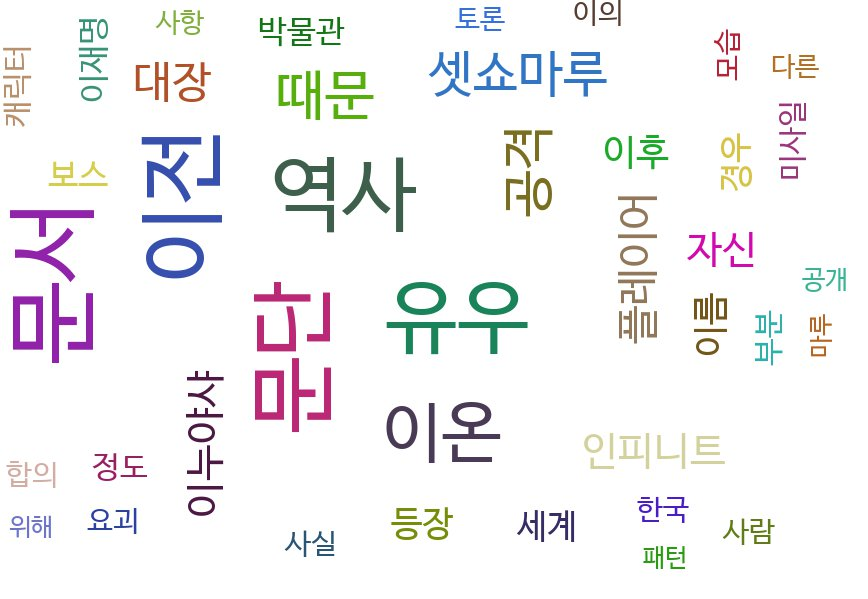

In [55]:
# 가장 출현 빈도수가 높은 40개의 단어를 선정
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud 로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600),
fontname = 'NanumGothic', rectangular = False)

#생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename = 'wordcloud.jpg')

### [wordcloud 와 pillow 라이브러리를 이용한 워드 클라우드 시각화]
https://doitgrow.com/34
https://github.com/amueller/word_cloud

#### <1. wordcloud 설치>
콘다 프롬프트에서 아래 명령어 실행
conda install -c conda-forge wordcloud

#### <2. pillow 설치>
pip install pillow

In [56]:
!pip install pillow

In [61]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

(-0.5, 1999.5, 1999.5, -0.5)

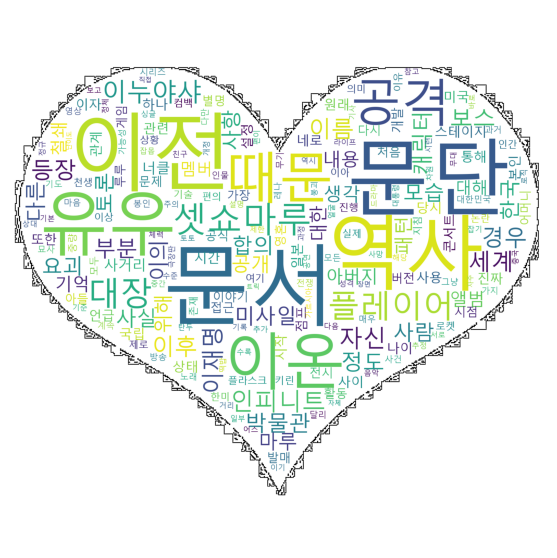

In [88]:
img = Image.open('heart.jpg')
img_array= np.array(img)


wc = WordCloud(font_path='malgun', width=1000, height=1000, scale=4.0, max_font_size=80, 
               mask= img_array, background_color='white', contour_width=0.5,  contour_color ='black' )
gen= wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(10,10))
plt.imshow(gen)
plt.axis('off')


(-0.5, 811.5, 991.5, -0.5)

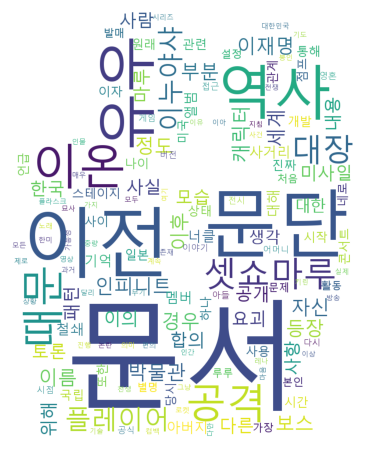

In [89]:
img = Image.open('personimage.jpg')
img_array= np.array(img)


wc = WordCloud(font_path='malgun', width=1000, height=1000, scale=4.0, max_font_size=80, 
               mask= img_array, background_color='white')
gen= wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(8,8))
plt.imshow(gen)
plt.axis('off')


## 제목 키워드 시각화

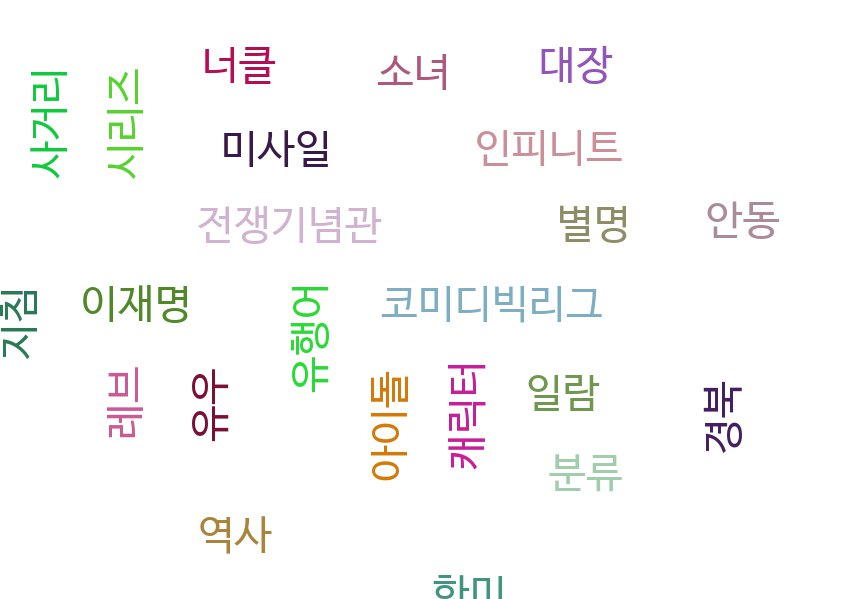

In [95]:
### 제목 키워드 시각화
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus) # nouns() 함수를 이용하여 title_corpus 문장 중 명사만을 추출
count = Counter(nouns) #각 명사의 빈도수 계산 

remove_char_counter = Counter({x:remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1}) #글자길이가 2개이상인 것들만 담기


ranked_tags = remove_char_counter.most_common(40)
# pytagcloud 로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600),
fontname = 'NanumGothic', rectangular = False)

#생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename = 'wordcloud.jpg')





(-0.5, 899.5, 899.5, -0.5)

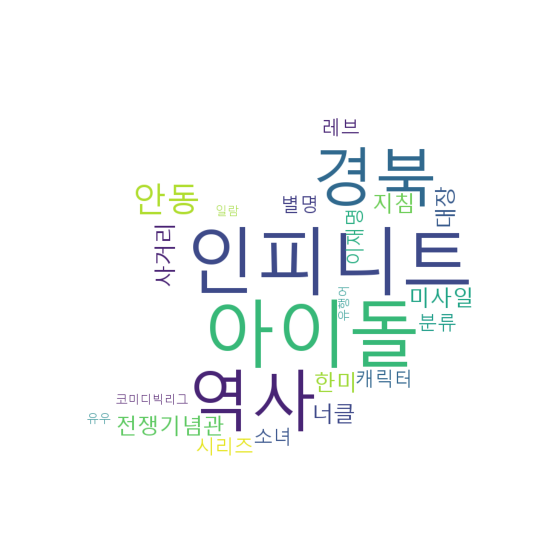

In [100]:
from PIL import Image
img = Image.open('bird.jpg')
img_array= np.array(img)


wc = WordCloud(font_path='malgun', width=1000, height=1000, scale=4.0, max_font_size=80, 
               mask= img_array, background_color='white' )
gen= wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(10,10))
plt.imshow(gen)
plt.axis('off')

## 카테고리 키워드 시각화

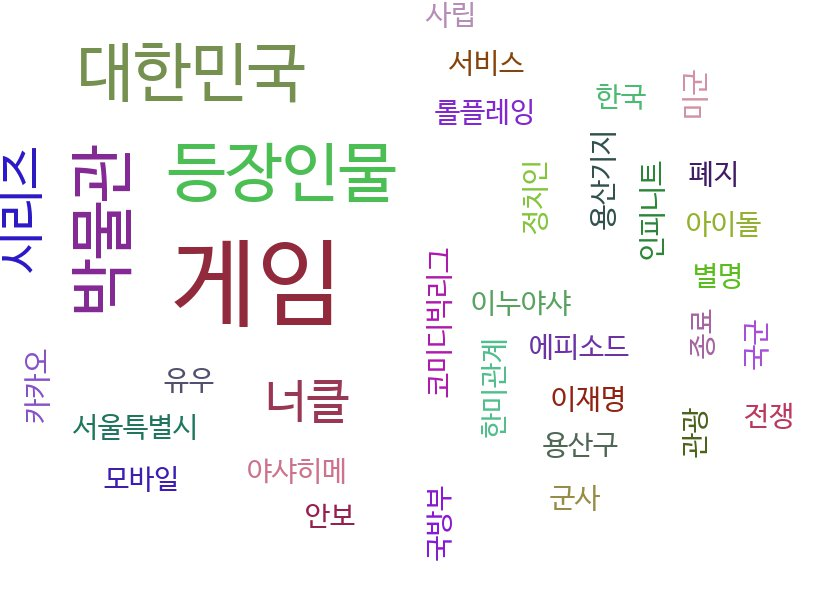

In [104]:
### 카테고리 키워드 시각화
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus) # nouns() 함수를 이용하여 title_corpus 문장 중 명사만을 추출
count = Counter(nouns) #각 명사의 빈도수 계산 

remove_char_counter = Counter({x:remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1}) #글자길이가 2개이상인 것들만 담기


ranked_tags = remove_char_counter.most_common(40)
# pytagcloud 로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600),
fontname = 'NanumGothic', rectangular = False)

#생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename = 'wordcloud.jpg')

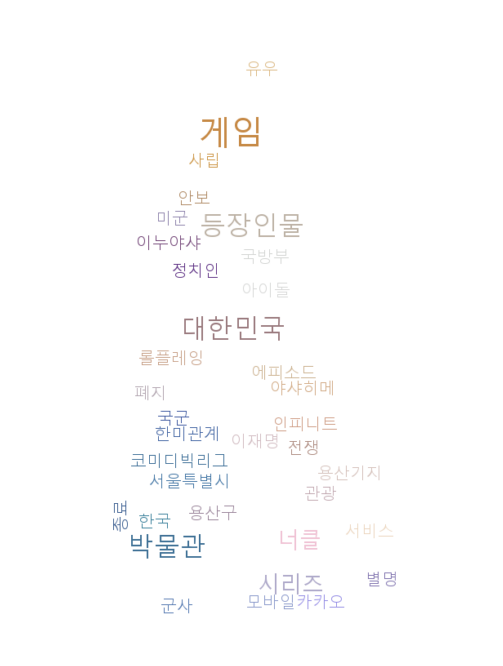

In [105]:
from PIL import Image
alice_coloring=np.array(Image.open("alice_img.png"))
wc=WordCloud(font_path='malgun',background_color='white',max_words=2000,
             mask=alice_coloring, max_font_size=40,random_state=42,contour_color='black')
gen=wc.generate_from_frequencies(remove_char_counter)
from wordcloud import ImageColorGenerator
imge_colors=ImageColorGenerator(alice_coloring)
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=imge_colors),interpolation='bilinear')
plt.axis('off')
plt.show()